In [5]:
!pip install gradio yfinance --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import gradio as gr

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/RAJGOWTHAM215/Transforming-healthcare-with-AI-powered-disease-prediction-based-on-patient-data/main/Symptom-severity.csv")  # Assuming this is the ADANISPORT dataset
print("Data Shape:", df.shape)
df.head()

Data Shape: (133, 2)


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [11]:
print("Missing values:\n", df.isnull().sum())

# Encode categorical columns if any
label_encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Missing values:
 Symptom    0
weight     0
dtype: int64


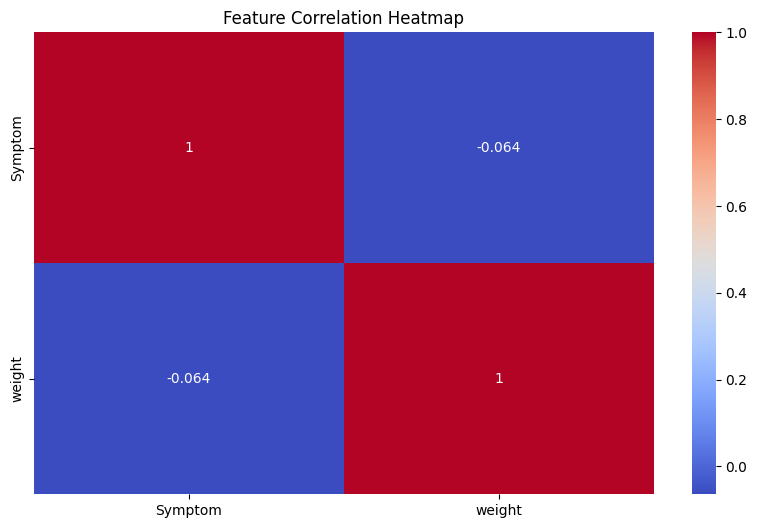

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of target variable
if 'Disease' in df.columns:
    sns.countplot(x='Disease', data=df)
    plt.xticks(rotation=90)
    plt.title("Disease Distribution")
    plt.show()

In [13]:
target = 'Disease' if 'Disease' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.11      0.20      0.14         5
           4       0.50      0.17      0.25        12
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.11        27
   macro avg       0.10      0.06      0.07        27
weighted avg       0.24      0.11      0.14        27

Confusion Matrix:
 [[0 0 1 0 1 0]
 [1 1 0 3 0 0]
 [1 3 2 4 2 0]
 [1 1 1 0 0 1]
 [0 3 0 0 0 0]
 [0 1 0 0 0 0]]


In [17]:
feature_names = X.columns.tolist()

def predict_disease(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)[0]
    if target in label_encoders:
        return label_encoders[target].inverse_transform([prediction])[0]
    return prediction

# Create Gradio UI
inputs = [gr.Number(label=feat) for feat in feature_names]
output = gr.Textbox(label="Predicted Disease")

gr.Interface(fn=predict_disease, inputs=inputs, outputs=output,
             title="AI-Powered Disease Predictor",
             description="Enter patient data to predict the possible disease using AI."
            ).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c008394197d55ba5ff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
